<h1><center> Mini Project 1 </center></h1>
<h3><center> FINA4390 <center><h3>
<h3><center> By Justin Woo, Deo Gracias Ong, Tshering Penjo, Warin Sae Sae <center><h3>


In [ ]:
from google.colab import files
import io

uploaded = files.upload()
# https://www.kaggle.com/meenavyas/ucicreditcard/data?fbclid=IwAR1raw2rZgDM24j8l2n5gcET1YhlafBvoDAevQtX5-K7prWFpnWFRdaYndU

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Upload Data

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))


# Analyze Data

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

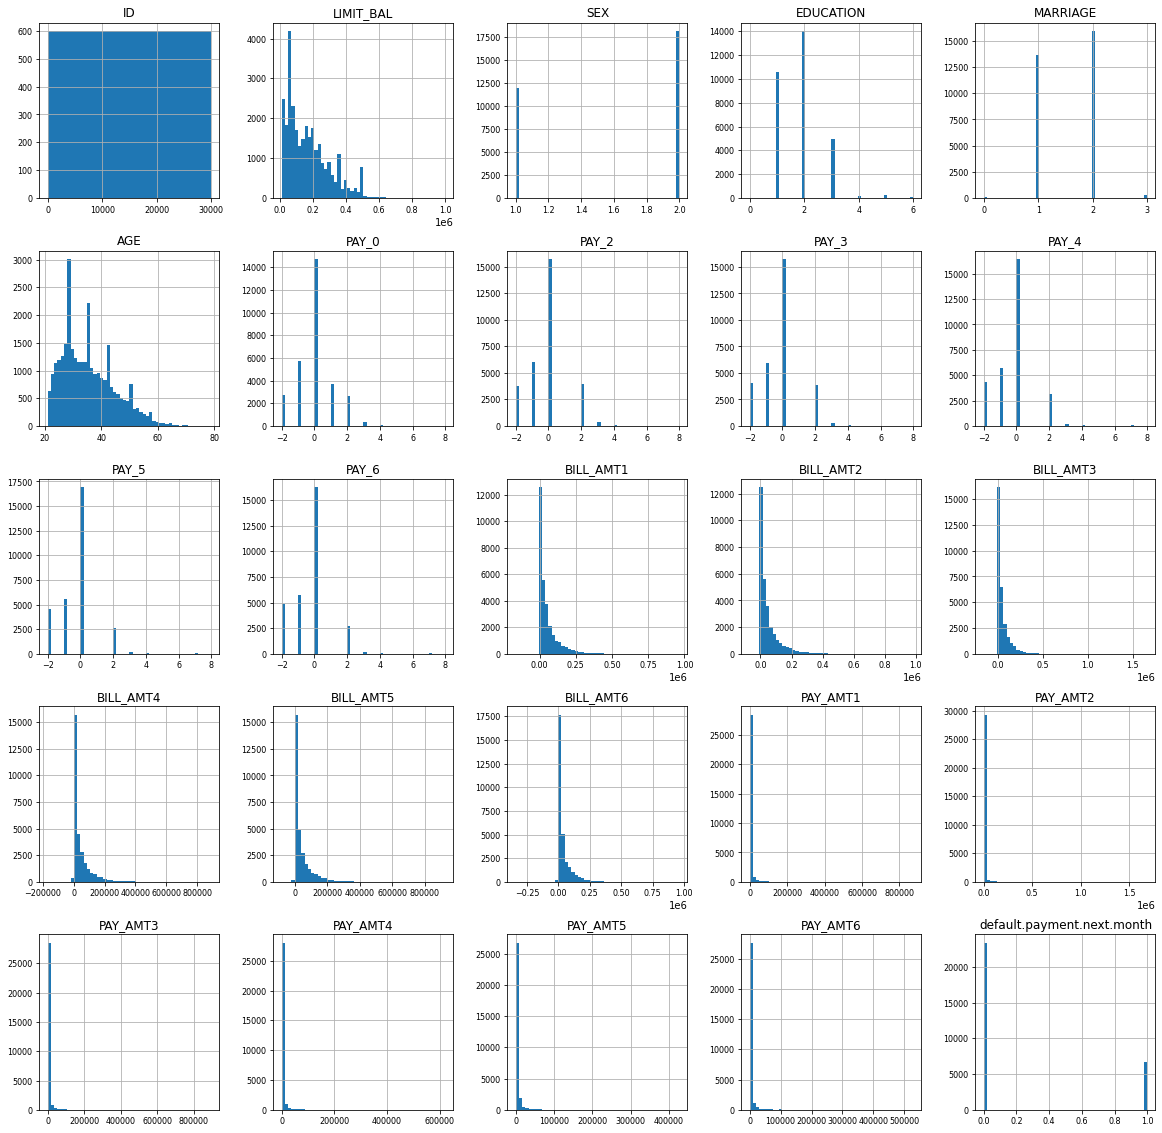

In [ ]:
# Histograms
df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

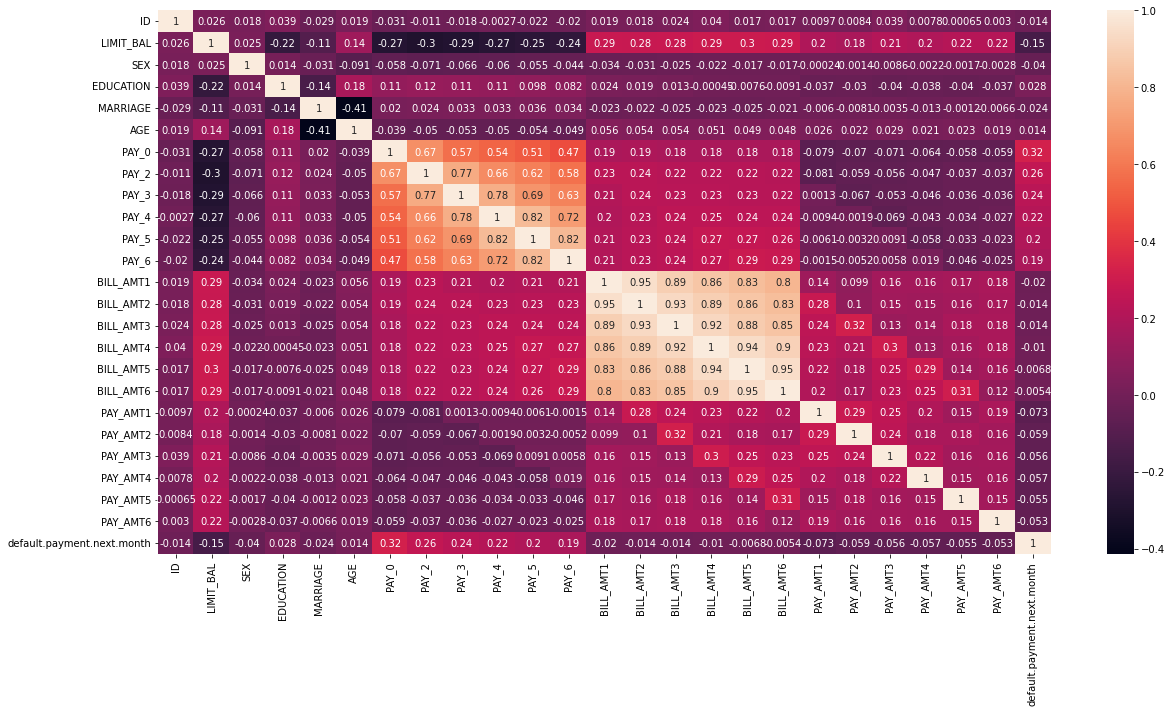

In [ ]:
# Heat Map
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

After analyzing the correlation heatmap, it makes sense to use PAY_1 through PAY_6 as our features for the model, as their correlation to whether an individual defaulted their payment. All other variables had correlations of under an absolute value of 6%. 

#Data Cleaning

In [ ]:
# Remove ID column (no value to model)
df.drop(columns = ['ID'], inplace = True)

In [ ]:
# Consistent names (Pay 1 - Pay 6)
df.rename(columns = {'PAY_0': 'PAY_1'}, inplace = True)

### Verify correct variable format

In [ ]:
df.describe().loc[['min', 'max']][['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
max,8.0,8.0,8.0,8.0,8.0,8.0


Values for these variables are within the range of -1 to 9, but the original data had min of -2 and a max of 8, so it was assumed that the values were 
shifted down one

In [ ]:
df['PAY_1'] = (df['PAY_1'] + 1)
df['PAY_2'] = (df['PAY_2'] + 1)
df['PAY_3'] = (df['PAY_3'] + 1)
df['PAY_4'] = (df['PAY_4'] + 1)
df['PAY_5'] = (df['PAY_5'] + 1)
df['PAY_6'] = (df['PAY_6'] + 1)

In [ ]:
df.describe().loc[['min', 'max']]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
min,10000.0,1.0,0.0,0.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1000000.0,2.0,6.0,3.0,79.0,9.0,9.0,9.0,9.0,9.0,9.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


### Machine Learning


In [ ]:
### Creating the Training and Testing Data

In [74]:

df = df.dropna()

X = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
y = df[['default.payment.next.month']]

# Add a constant to the independent value
X1 = sm.add_constant(X)


# Split the sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# make regression model 
model = sm.Logit(y_train, X_train)

# fit model and print results
results = model.fit()
print(results.summary())


# odds ratios only
print("Odds ratios are")
print(np.exp(results.params))


# Predict outcomes
prob_pred = results.predict(X_test)
#print(prob_pred)


y_pred = [ 0 if x < 0.25 else 1 for x in prob_pred]

#print(y_pred)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(accuracy_score(df["Actual"], df["Predicted"]))
print(" ")
print(" ")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.676233
         Iterations 4
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23994
Method:                                   MLE   Df Model:                            5
Date:                        Mon, 21 Feb 2022   Pseudo R-squ.:                 -0.2759
Time:                                03:41:09   Log-Likelihood:                -16230.
converged:                               True   LL-Null:                       -12720.
Covariance Type:                    nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PAY_1         -0.1318      0.015     -8.690 

ValueError: ignored